[GAI Project 1 Grading Policy](https://hackmd.io/@shiro-wang/SkaB8Vc3p)

NumPy 練習1

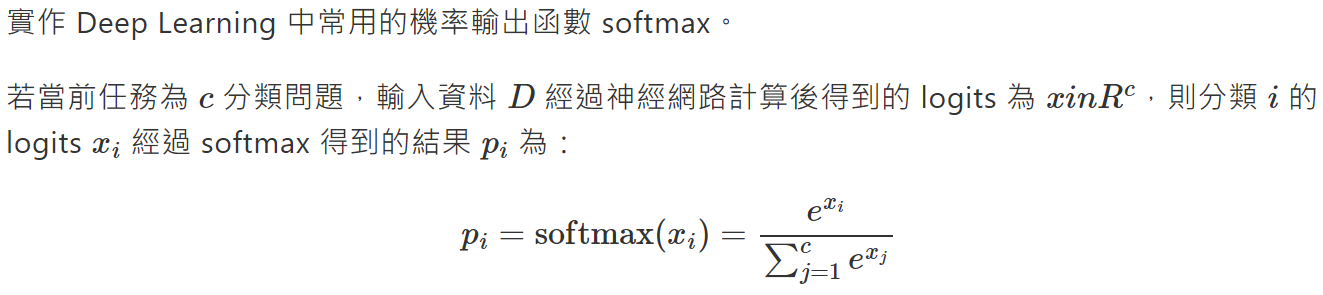

In [2]:
import numpy as np

In [3]:
# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)

# TODO
print(x)
print(x / np.exp(x).sum())

[0.99527898 0.35765635 0.71785399 0.03724261 0.29082828 0.26918233
 0.90128939 0.01538696 0.9282536  0.50685259]
[0.05674894 0.02039289 0.04093069 0.0021235  0.01658248 0.01534827
 0.05138983 0.00087734 0.05292728 0.02889978]


NumPy 練習2

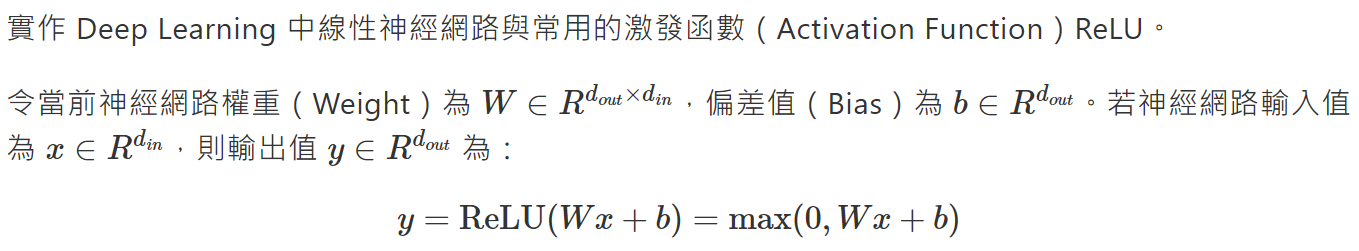

In [4]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5

# TODO

out = W @ x + b

for i in range(out.shape[0]):
    if out[i] < 0 : out[i] = 0

print(x)
print()
print(out)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [17.40128267]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 9.59509022]
 [ 0.61828693]
 [ 0.        ]
 [16.50976801]
 [ 0.        ]
 [12.02135566]
 [ 0.        ]
 [ 0.        ]
 [ 3.11668164]
 [10.73800773]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 2.65116502]
 [ 0.        ]
 [ 7.93925164]
 [ 0.        ]
 [12.65907405]
 [ 0.        ]
 [19.33594117]]


pandas
練習1
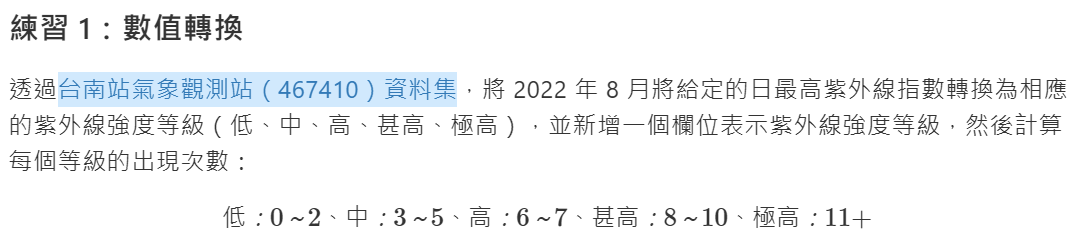

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('/content/467410-2022-08.csv', skiprows=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsTime         31 non-null     int64  
 1   StnPres         31 non-null     float64
 2   SeaPres         31 non-null     float64
 3   StnPresMax      31 non-null     float64
 4   StnPresMaxTime  31 non-null     object 
 5   StnPresMin      31 non-null     float64
 6   StnPresMinTime  31 non-null     object 
 7   Temperature     31 non-null     float64
 8   T Max           31 non-null     float64
 9   T Max Time      31 non-null     object 
 10  T Min           31 non-null     float64
 11  T Min Time      31 non-null     object 
 12  Td dew point    31 non-null     float64
 13  RH              31 non-null     int64  
 14  RHMin           31 non-null     int64  
 15  RHMinTime       31 non-null     object 
 16  WS              31 non-null     float64
 17  WD              31 non-null     int64

In [7]:
print(data['UVI Max'])
print(type(data['UVI Max'][1]))

0     11
1      4
2     11
3     11
4     14
5     12
6      8
7     11
8      7
9     13
10    10
11    15
12    14
13    12
14     8
15    11
16    13
17     7
18    14
19    13
20    13
21    14
22    13
23     8
24    14
25    13
26    13
27    12
28    11
29    13
30    13
Name: UVI Max, dtype: int64
<class 'numpy.int64'>


In [8]:
# 轉換成等級並新增欄位
def UVI_trans(num : str) -> str:
    if int(num) < 3 : return '低'
    elif int(num) < 6 : return '中'
    elif int(num) < 8 : return '高'
    elif int(num) < 11 : return '甚高'
    else : return '極高'

new_col = data['UVI Max'].apply(UVI_trans)
data['UVI level'] = new_col

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsTime         31 non-null     int64  
 1   StnPres         31 non-null     float64
 2   SeaPres         31 non-null     float64
 3   StnPresMax      31 non-null     float64
 4   StnPresMaxTime  31 non-null     object 
 5   StnPresMin      31 non-null     float64
 6   StnPresMinTime  31 non-null     object 
 7   Temperature     31 non-null     float64
 8   T Max           31 non-null     float64
 9   T Max Time      31 non-null     object 
 10  T Min           31 non-null     float64
 11  T Min Time      31 non-null     object 
 12  Td dew point    31 non-null     float64
 13  RH              31 non-null     int64  
 14  RHMin           31 non-null     int64  
 15  RHMinTime       31 non-null     object 
 16  WS              31 non-null     float64
 17  WD              31 non-null     int64

In [9]:
# 計算各等級出現次數
print(data['UVI level'].value_counts())

極高    24
甚高     4
高      2
中      1
Name: UVI level, dtype: int64


pandas 練習2
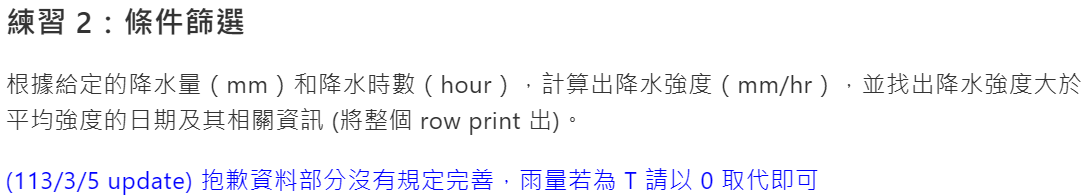


In [10]:
def T_process(t : str) -> float:
    return 0 if t == 'T' else float(t)

precp = data['Precp'].apply(T_process)
precp_hour = data['PrecpHour']
precp_intensity = precp / precp_hour
for i in range(precp_intensity.shape[0]):
    if precp_intensity[i] > precp_intensity.mean():
        print(data.iloc[i])
        print()

ObsTime                             2
StnPres                        1005.9
SeaPres                        1009.0
StnPresMax                     1008.1
StnPresMaxTime    2022/08/02 10:34:00
StnPresMin                     1003.9
StnPresMinTime    2022/08/02 16:38:00
Temperature                      27.5
T Max                            28.9
T Max Time        2022/08/02 00:01:00
T Min                            24.6
T Min Time        2022/08/02 10:35:00
Td dew point                     24.4
RH                                 84
RHMin                              74
RHMinTime         2022/08/02 01:22:00
WS                                1.9
WD                                200
WSGust                            8.5
WDGust                            180
WGustTime         2022/08/02 05:20:00
Precp                            91.0
PrecpHour                         3.6
PrecpMax10                       17.5
PrecpMax10Time    2022/08/02 09:54:00
PrecpMax60                       67.5
PrecpMax60Ti

Matplotlib 練習1

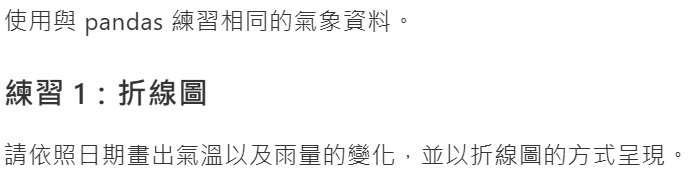

In [11]:
import matplotlib.pyplot as plt

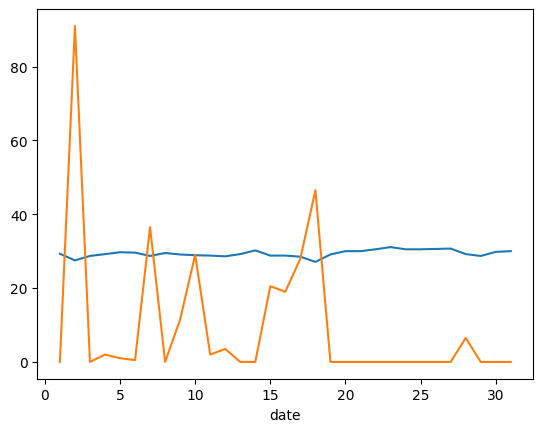

In [12]:
def T_process(t : str) -> float:
    return 0 if t == 'T' else float(t)

temperature = data['Temperature']
precp = data['Precp'].apply(T_process)
date = np.arange(1, 32)

plt.plot(date, temperature)
plt.plot(date, precp)

plt.xlabel('date')

plt.show()
plt.close()

matplotlib 練習2
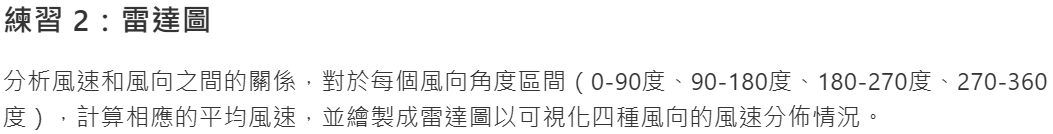

In [13]:
WS = data['WS'] # 風速
WD = data['WD'] # 風向

print(type(WS[1]), type(WD[1]))

<class 'numpy.float64'> <class 'numpy.int64'>


In [14]:
l1 = [3]
print(np.append(l1, WS[1]))

[3.  1.9]


In [15]:
q0 = []
q1 = []
q2 = []
q3 = []


for i in range(WD.shape[0]):
    if WD[i] <= 90 : q0 = np.append(q0, WS[i])
    elif WD[i] <= 180 : q1 = np.append(q1, WS[i])
    elif WD[i] <= 270 : q2 = np.append(q2, WS[i])
    else : q3 = np.append(q3, WS[i])

mean = [q0.mean(), q1.mean(), q2.mean(), q3.mean()]
print(mean)

[2.0, 2.6, 2.4222222222222225, 2.4714285714285715]


In [16]:
wind_data = pd.concat([WS, WD], axis=1)
wind_data = wind_data.sort_values(ascending=True, by='WD', ignore_index=True)
print(wind_data)

     WS   WD
0   2.3   10
1   2.0   20
2   2.0   20
3   1.9   20
4   2.0   60
5   1.8   60
6   1.9   90
7   2.1   90
8   1.8  100
9   2.1  110
10  2.0  120
11  2.4  130
12  2.3  130
13  2.8  150
14  4.8  180
15  2.0  190
16  3.8  190
17  2.2  190
18  2.6  190
19  1.9  200
20  2.6  220
21  2.1  240
22  2.6  260
23  2.0  260
24  2.0  280
25  2.6  300
26  2.1  300
27  2.7  310
28  2.3  310
29  3.2  340
30  2.4  360


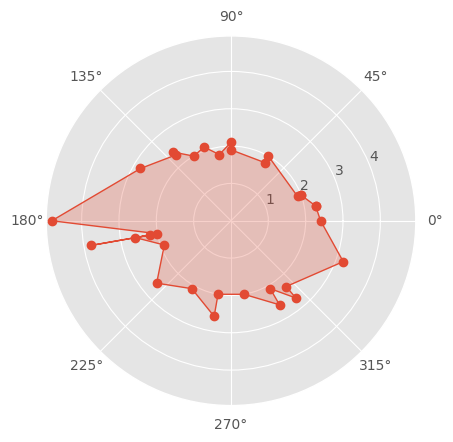

In [17]:
plt.style.use('ggplot')

values=np.concatenate((wind_data['WS'],[wind_data['WS'][0]]))
angles=np.concatenate((wind_data['WD'],[wind_data['WD'][0]])) * 2 * np.pi / 360

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=1)
ax.fill(angles, values, alpha=0.25)
ax.grid(True)


plt.show()

scikit-learn
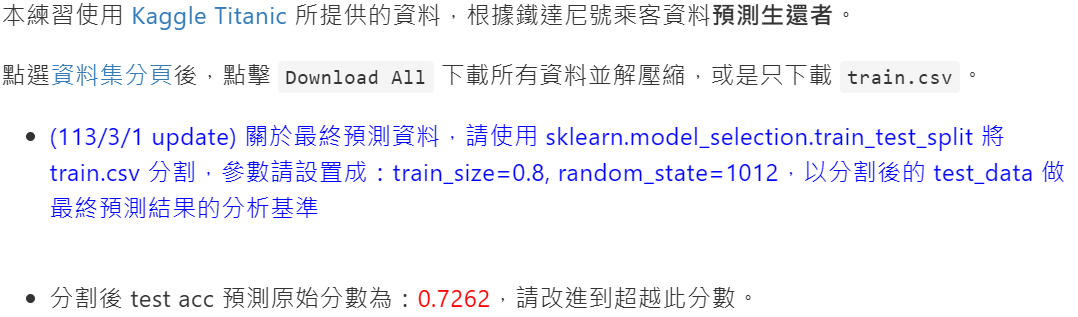

scikit-learn 練習1

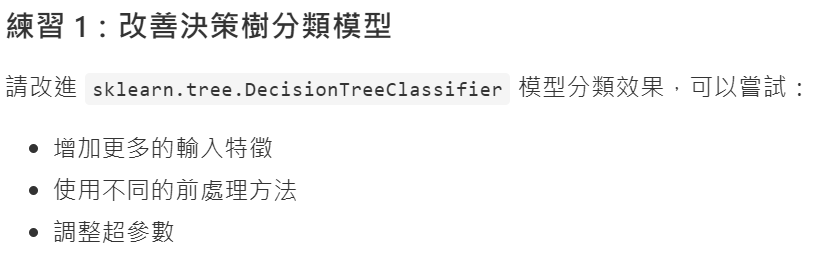

In [91]:
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

import numpy as np


df = pd.read_csv('/content/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Age', 'Fare']]
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)
# 填補缺失值
df_x['Age'] = imputer.transform(age)

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)


# 創造決策樹模型
# original: model = DecisionTreeClassifier(random_state=1012)
model = DecisionTreeClassifier(
    random_state = 1012,
    criterion = 'gini',

    max_depth = 7,
    max_leaf_nodes = 20
)


# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.8497191011235955
test accuracy: 0.8156424581005587


<ipython-input-91-db56b304370c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)
<ipython-input-91-db56b304370c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Sex'] = le.transform(df_x['Sex'])


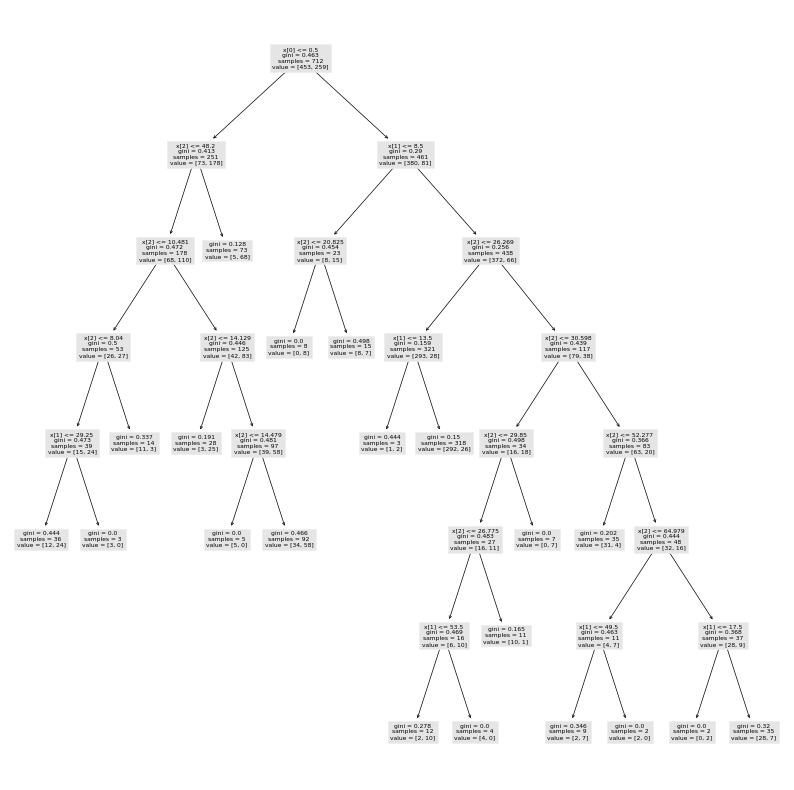

In [92]:
# 匯入決策樹繪圖工具
from sklearn.tree import plot_tree

# 創造繪圖環境
fig, ax = plt.subplots(figsize=(10, 10))

# 繪製訓練後的模型
plot_tree(model, ax=ax)

# 繪製圖表
plt.show()

scikit-learn 練習2

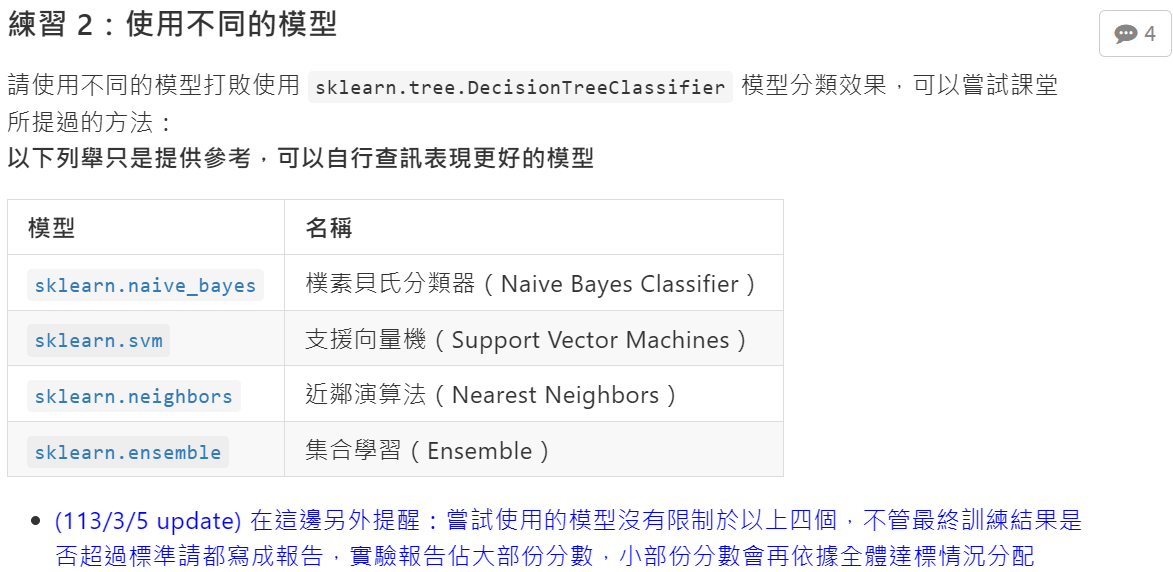

In [19]:
from sklearn.naive_bayes import GaussianNB

# 創造模型
model = GaussianNB()

# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.7752808988764045
test accuracy: 0.8044692737430168


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# 創造模型
model = KNeighborsClassifier()


# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.800561797752809
test accuracy: 0.7039106145251397


In [131]:
from sklearn.svm import LinearSVC

# 創造模型
model = LinearSVC()


# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.7303370786516854
test accuracy: 0.7821229050279329


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [126]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
model = XGBClassifier(n_estimators=200, learning_rate=0.015)

# 使用訓練資料訓練模型
model.fit(train_x, train_y)

# 使用訓練資料預測分類
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

# 計算準確度
train_acc = accuracy_score(train_y, pred_train)
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.8834269662921348
test accuracy: 0.8100558659217877
